# **UNIVERSIDAD ESTATAL A DISTANCIA**
TALLER INTRODUCCION A CIENCIA DE DATOS

**SESION #1**

# Preprocesamiento de datos - Caso TITANIC

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
 data =  pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/UNED/master/titanic.csv')

In [ ]:
data.shape

(891, 12)

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Podemos seleccionar el arreglo de columas que sean de nuestro interés:

In [ ]:
cols_to_use = ['Pclass', 'Sex', 'Age','Fare','Survived']

In [ ]:
data = data[cols_to_use]

In [ ]:
data.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
5,3,male,NaN,8.4583,0
6,1,male,54.0,51.8625,0
7,3,male,2.0,21.0750,0
8,3,female,27.0,11.1333,1
9,2,female,14.0,30.0708,1


Validamos la existencia de NaN:

In [ ]:
data.isnull().values.any()

True

Validamos el tamaño original del dataset:

In [ ]:
data.shape

(891, 5)

Decidimos eliminar cualquier instancia que contenga al menos, un NaN:

In [ ]:
data = data.dropna()

y verificamos el tamaño final del dataset:

In [ ]:
data.shape

(714, 5)

Notamos como 177 instancias fueron eliminadas.

# ¿Qué sigue? Debemos de verificar si hay alguna variable categórica, de existir debemos de binarizarla:

In [ ]:
data['Sex'] = data['Sex'].replace({'male' : 0, 'female' : 1})

In [ ]:
data.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
6,1,0,54.0,51.8625,0
7,3,0,2.0,21.0750,0
8,3,1,27.0,11.1333,1
9,2,1,14.0,30.0708,1
10,3,1,4.0,16.7000,1


Finalmente como etapa previa a los algoritmos de aprendizaje, partimos nuestro dataset en *training* y *testing*:

In [ ]:
from sklearn.model_selection import train_test_split

Creamos nuestro conjunto de features (X) y labels (y):

In [ ]:
features = data[['Sex','Age','Fare']]
labels = data['Survived']

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, random_state = 13)

In [ ]:
data.shape

(714, 5)

In [ ]:
X_train.shape

(535, 3)

In [ ]:
y_test.shape

(179,)

Nótese como por defecto el tamaño de *training* es del 75% (535/714) y *testing* del 25% (179/714), si deseamos una partición distinta, por ejemplo 80% *training* y 20% *testing*, lo hacemos de la siguiente manera:

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 13) 

In [ ]:
X_train.shape

(571, 3)

Efectivamente ahora 571 corresponde al 80% de 714.

### GRAFICAR: (en PANDAS 0.25)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/UNED/master/titanic.csv')

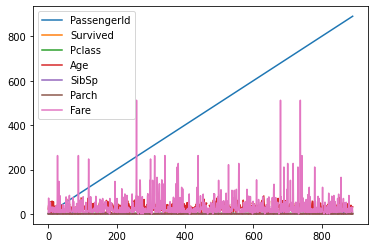

In [8]:
dataset.plot()

(10.0, 20.0)

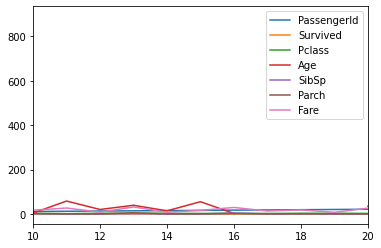

In [9]:
dataset.plot()
plt.xlim(10,20)

(10.0, 30.0)

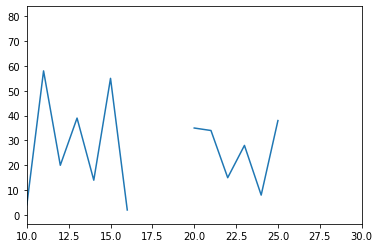

In [10]:
dataset['Age'].plot()
plt.xlim(10,30)

(10.0, 30.0)

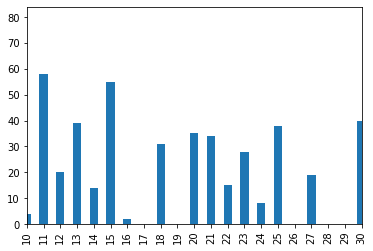

In [11]:
dataset['Age'].plot.bar()
plt.xlim(10,30)

In [ ]:
Eliminemos algunas columnas

In [18]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Eliminemos el ID del pasajero

In [19]:
cols_to_use = ['Pclass', 'Age','Fare','Survived']

In [20]:
dataset = dataset[cols_to_use]

In [21]:
dataset.head(10)

,Pclass,Age,Fare,Survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
5,3,NaN,8.4583,0
6,1,54.0,51.8625,0
7,3,2.0,21.0750,0
8,3,27.0,11.1333,1
9,2,14.0,30.0708,1


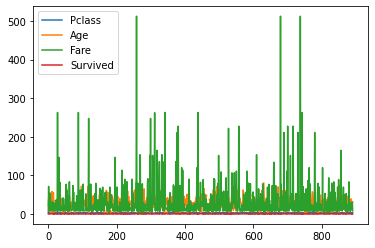

In [22]:
dataset.plot()